In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

In [5]:
import numpy as np

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

def Model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

# Ici on a ajouter epsilon pour eviter d'avoir log(0)
def Cost(A, y):
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    L = -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return L

def Gradients(A, X, y):
    dl = 1 / len(y) * np.dot(X.T, (A - y))
    db = 1 / len(y) * np.sum(A - y)
    return dl, db

def Update(W, b, dl, db, pas):
    W = W - pas * dl
    b = b + pas * db
    return W, b


In [46]:
from tqdm import tqdm # Barre de progression

def entrainer_neurone(X, y, pas, n_iter):
  i=0;
  Loss=[]

  W,b = initialisation(X);
  for i in tqdm(range(n_iter)):
    A=Model(X, W, b)
    L=Cost(A, y)
    Loss.append(L)
    dl, db=Gradients(A, X, y)
    W,b = Update(W, b, dl, db, pas)

  plt.plot(Loss)
  plt.show()
  return W,b

#Import des données

In [7]:
X_train, y_train, X_test, y_test =load_data()

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [9]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([500, 500]))
(array([0., 1.]), array([100, 100]))


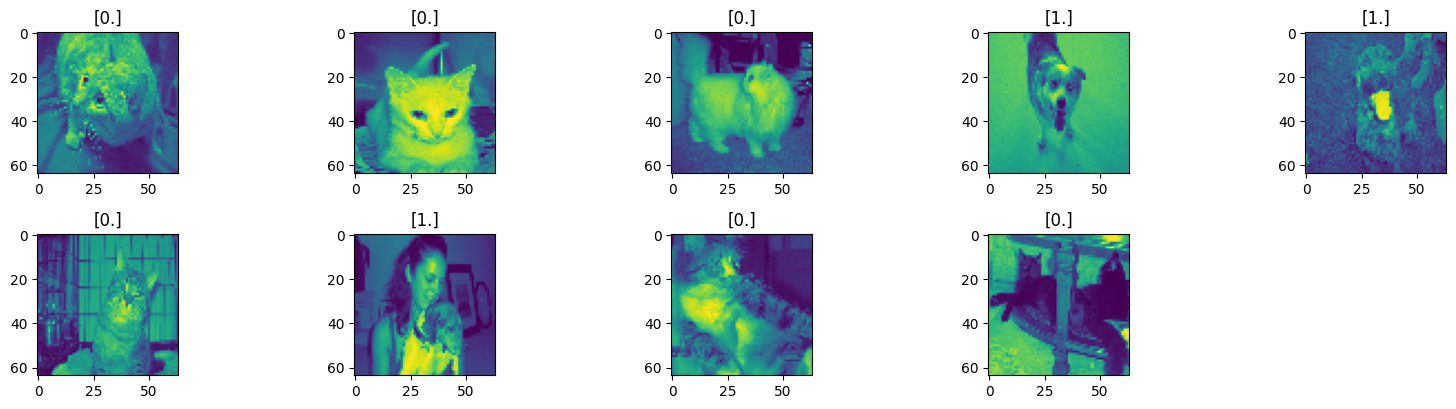

In [10]:
plt.figure(figsize=(16,8))
for i in range(1,10):
  plt.subplot(4, 5, i)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.tight_layout() #To make the title show better
plt.show()

#Modele
Nos entrées sont des images. Chaque image est consituée de n pixels. On peut alors traiter chaque pixel comme étant une variales. Donc nous aurons n variables et n poids.
Il faut tout d'abord aplatir notre image en un vecteur de variables (matrice -> vacteur)

In [11]:
# Transformer les images en niveaux de gris

X_train.shape

(1000, 64, 64)

Prob : les valeurs des pixels varient entre 0 et 256, ce qui cause une erreur de type Overflow lors du calcul de l exponentiel (causée lorsque la valeur retournée est trèèèès grande)
Rappel : Exponentiel tend vers l infini.

In [12]:
def transform_to_binary(img) :
  for i in range(0,img.shape[0]):
    for j in range (0, img.shape[1]):
      if(img[i][j]>=128):
        img[i][j]=1
      elif(img[i][j]<128):
        img[i][j]=0
  return img

# Better version
def transform_to_binary(img):
    binary_img = np.where(img >= 128, 1, 0)
    return binary_img

In [13]:
for i in range(0,X_train.shape[0]):
  X_train[i]=transform_to_binary(X_train[i])


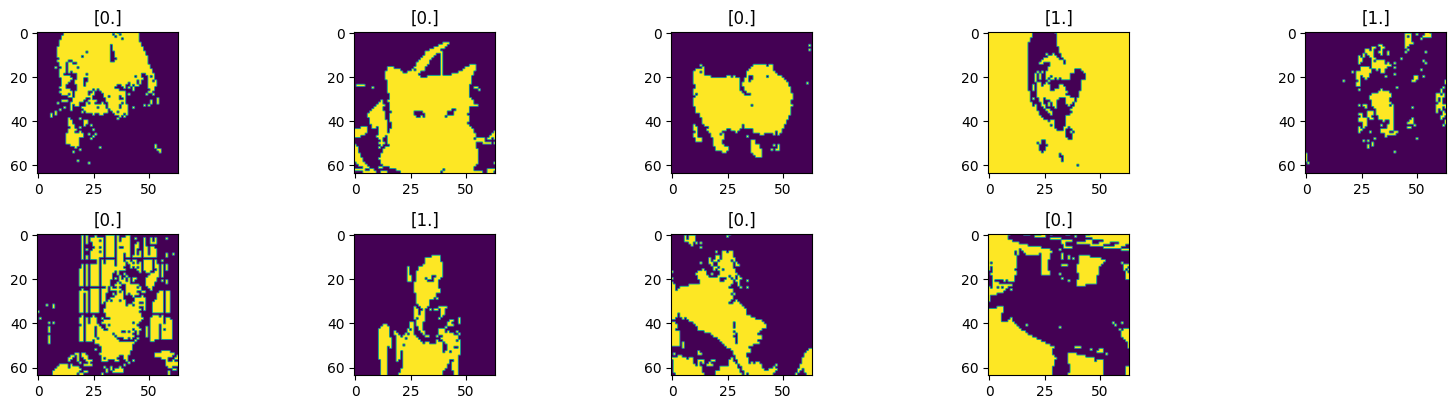

In [14]:
plt.figure(figsize=(16,8))
for i in range(1,10):
  plt.subplot(4, 5, i)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.tight_layout() #To make the title show better
plt.show()

In [15]:
# Transformation des matrices en array
X_train_flat=[]
for i in range(0,y_train.shape[0]):
  X_train_flat.append(X_train[i].flatten())

#Ou bien
X_train_flat=X_train.reshape(X_train.shape[0],-1)

In [16]:
X_train_flat=np.array(X_train_flat)


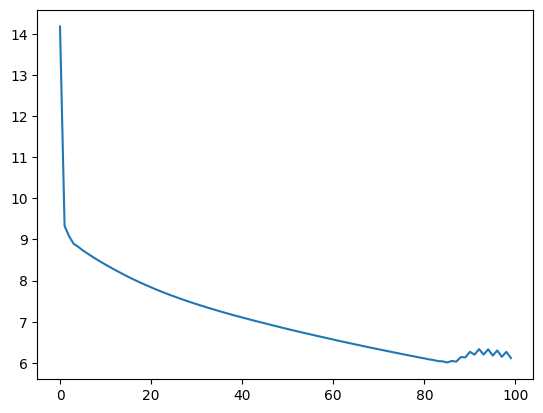

In [21]:
W, b=entrainer_neurone(X_train_flat, y_train, pas=0.1, n_iter=100)

In [22]:
X_test_flatten=[]
for i in range(0,X_test.shape[0]):
  X_test_flatten.append(transform_to_binary(X_test[i]).flatten())

X_test_flatten=np.array(X_test_flatten)
X_test_flatten.shape

(200, 4096)

In [23]:
y_pred=[]
for i in range(0,X_test_flatten.shape[0]):
  A=Model(X_test_flatten[i], W, b)
  y_pred.append(1 if A < 0.5 else 0)
y_pred=np.array(y_pred)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.535

#Modele 2

In [25]:
 X_train, y_train, X_test, y_test =load_data()

In [26]:
X_train_flat=X_train.reshape(X_train.shape[0],-1)

In [27]:
X_train_flat.shape

(1000, 4096)

In [37]:
X_test_flat=X_test.reshape(X_test.shape[0],-1)

In [35]:
X_train_flat.max()

0.996078431372549

In [38]:
X_test_flat = X_test_flat/255

In [29]:
X_train_flat = X_train_flat/255

In [39]:
X_test_flat.max()

0.996078431372549

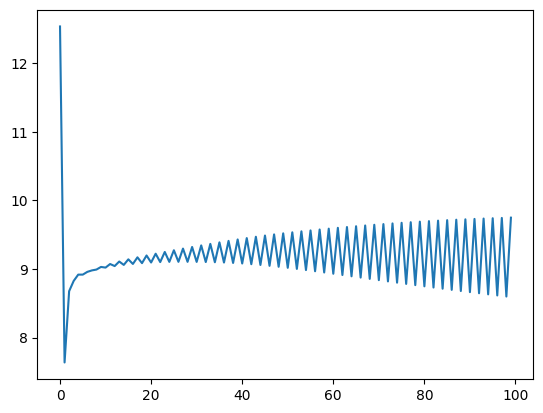

In [36]:
W, b = entrainer_neurone(X_train_flat, y_train, pas=0.1, n_iter=100)

Ce probleme est en rapport avec le choix des hyperparametres de notre modele.
Il y a de fortes oscillations car le pas du learning rate est trop grand.

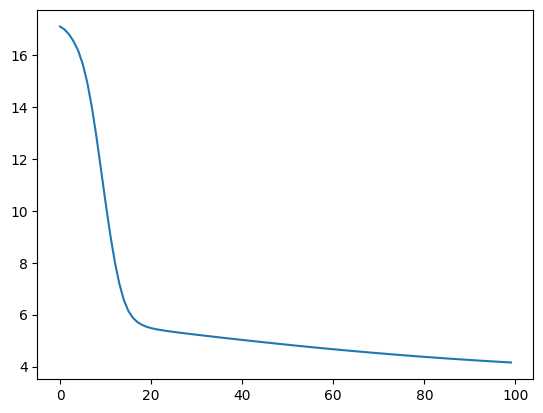

In [40]:
 W, b = entrainer_neurone(X_train_flat, y_train, pas=0.01, n_iter=100)

Exemple d'overfitting avec 10000 itérations

100%|██████████| 10000/10000 [01:04<00:00, 155.50it/s]


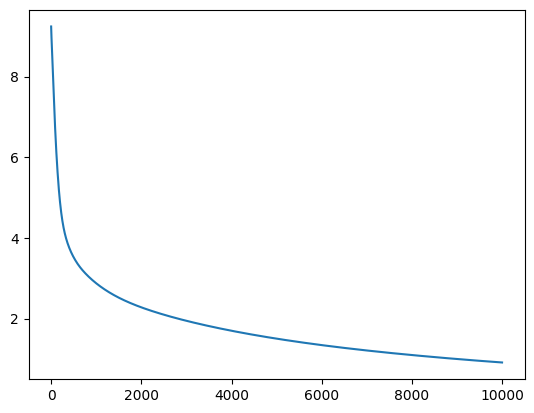

In [47]:
  W, b = entrainer_neurone(X_train_flat, y_train, pas=0.01, n_iter=10000)

In [50]:
 y_pred=[]
for i in range(0,X_test_flat.shape[0]):
  A=Model(X_test_flat[i], W, b)
  y_pred.append(1 if A < 0.5 else 0)
y_pred=np.array(y_pred)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.48

Probleme : Nous n'avons pas assez de données pour entrainer le modèle et de plus on utilise un seul neurone : modele linéaire et non complexe.